## Neural Network Simulation to perform parity judgement on input units

# 

# 

In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# 

In [2]:
#3 determining desired output for each pattern
def output(patterns):
    out = []
    for i in patterns:
        x = np.mod(np.sum(i),2)
        if x == 0:
            out.append(1)
        if x ==1:
            out.append(0)
    return out

In [3]:
#4 create a matrix connecting input to hidden units
def wfg(num_hidden,num_input):
    '''
    num_input number of arrays with num_hidden number of elements
    '''
    out = []
    for i in range(num_hidden):
        out.append(np.random.uniform(-0.5,0.5,num_input))
    return out

In [4]:
def wgh(num_hidden,num_output):
    '''
    num_hidden number of arrays with num_input number of elements
    '''
    out = []
    for i in range(num_output):
        out.append(np.random.uniform(-0.5,0.5,num_hidden))
    return out

In [5]:
def activation_fn(x):
     return 1 / (1+np.exp(-x))

In [6]:
def activation_fn_derivative(input_to_hidden):
    return np.exp(input_to_hidden) / (np.exp(input_to_hidden) + 1) ** 2

Epoch: 0 || SSE: 1.8423598487169186
Epoch: 10 || SSE: 1.4715970439957327
Epoch: 20 || SSE: 1.13864496253712
Epoch: 30 || SSE: 0.6651241151043994
Epoch: 40 || SSE: 0.40071679016079226
Epoch: 50 || SSE: 0.2948236162764526
Epoch: 60 || SSE: 0.20118357485965505
Epoch: 70 || SSE: 0.0922766581131301
Epoch: 80 || SSE: 0.06204633426226764
Epoch: 90 || SSE: 0.04923784898414285
Epoch: 100 || SSE: 0.041641927972217885
Epoch: 110 || SSE: 0.03650138797170384
Epoch: 120 || SSE: 0.032747168463055955
Epoch: 130 || SSE: 0.029863043992388844
Epoch: 140 || SSE: 0.027565363907625273
Epoch: 150 || SSE: 0.02568396134651261
Epoch: 160 || SSE: 0.024109958245133963
Epoch: 170 || SSE: 0.022770152440947062
Epoch: 180 || SSE: 0.021613349112368403
Epoch: 190 || SSE: 0.020602574251742424
Epoch: 200 || SSE: 0.019710399821629775
Epoch: 210 || SSE: 0.018916013027174668
Epoch: 220 || SSE: 0.018203311055192965
Epoch: 230 || SSE: 0.01755962352712231
Epoch: 240 || SSE: 0.016974832656820385
Epoch: 250 || SSE: 0.01644075301

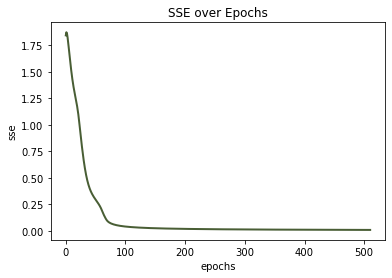

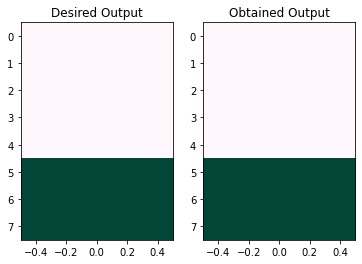

In [188]:
#parameters of model

num_input = 8
num_hidden = 3
num_output = 1
learning_rate = 3

patterns = np.round(np.random.rand(num_input,8))
desired_output = output(patterns)

#input to hidden units
w_fg = wfg(num_hidden,num_input)
#hidden units to output units
w_gh = wgh(num_hidden,num_output)




all_sse = []


for epoch in range(1000):
    output_errors = []
    #loops through each pattern in "patterns" 
    for i in range(num_input):
        input_to_hidden = np.dot(w_fg,patterns[i])
        hidden_activation = activation_fn(input_to_hidden)
        input_to_output = np.dot(w_gh,hidden_activation)
        output_activation = activation_fn(input_to_output)
        output_error = desired_output[i] - output_activation
        output_errors.append(output_error)

    # part g
        term1 = learning_rate * (np.diag(activation_fn_derivative(input_to_hidden)) )
        term2 = np.dot(np.array(w_gh).T,(np.diag(output_error)))
        term3 = activation_fn_derivative(np.dot(w_gh,hidden_activation))
        dw_fg = np.dot(np.array([patterns[i]]).T,np.array([np.dot(np.dot(term1,term2),term3)]))
        w_fg = w_fg + dw_fg.T
        
        dw_gh = np.dot(np.array([learning_rate * (activation_fn_derivative(np.dot(w_gh , hidden_activation))) * output_error]).T , np.array([hidden_activation]))
        w_gh = w_gh + dw_gh
        
        
    sse_input_to_hidden = np.dot(w_fg,patterns)
    sse_hidden_activation = activation_fn(sse_input_to_hidden)
    sse_input_to_output = np.dot(w_gh,sse_hidden_activation)
    sse_output_activation = activation_fn(sse_input_to_output)
    sse_output_error = desired_output - sse_output_activation
  
    #sse = np.trace(np.dot(sse_output_error ,output_errors ))
    sse = np.trace(sse_output_error * output_errors )
    all_sse.append(sse)
    
    if epoch % 10 == 0:
        print('Epoch:', epoch, '|| SSE:',sse)
    
    if sse < 0.01 :
        print('Epoch:', epoch, 'SSE:', sse)
        print("Training Complete")
        
        plt.plot(range(epoch+1),all_sse,lw=2, color ="#495e35")
        plt.title("SSE over Epochs")
        plt.xlabel("epochs")
        plt.ylabel("sse")
        plt.show()
        

        # Create a 1x2 subplot for displaying the images
        fig, ax = plt.subplots(1, 2)

        
        #make 1D array into 2D matrix
        desired_output_matrix = np.reshape(desired_output, (num_input, num_output))
        
        obtained_output = np.round(sse_output_activation)
        obtained_output_matrix = np.reshape(obtained_output, (num_input, num_output))
       
        
       # Display the desired output matrix in the first subplot
        ax[0].set_title("Desired Output")
        ax[0].imshow(desired_output_matrix, cmap='PuBuGn', aspect='auto')

        # Display the obtained output matrix in the second subplot
        ax[1].set_title("Obtained Output")
        ax[1].imshow(obtained_output_matrix, cmap='PuBuGn', aspect='auto')
        
        
        # Show the plot
        plt.show()
        break
     
    
    if epoch == 999:
        print("Broke without converging")
    
    

# 

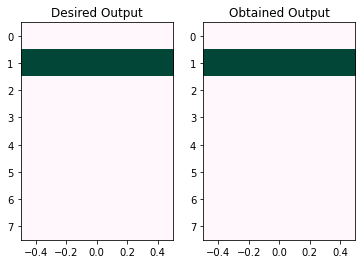

In [232]:
new_patterns = np.round(np.random.rand(num_input,8))
new_desired_output = output(new_patterns)
new_output_errors=[]
new_all_sse = []
new_out = []

for i in range(num_input):
    new_input_to_hidden = np.dot(w_fg,new_patterns[i])
    new_hidden_activation = activation_fn(new_input_to_hidden)
    new_input_to_output = np.dot(w_gh,new_hidden_activation)
    new_output_activation = activation_fn(new_input_to_output)
    new_out.append(new_output_activation)
    new_output_error = new_desired_output[i] - new_output_activation
    new_output_errors.append(new_output_error)
    
new_desired_output_matrix = np.reshape(new_desired_output, (num_input, num_output))
new_obtained_output = np.round(new_out)
new_obtained_output_matrix = np.reshape(new_obtained_output, (num_input, num_output))
   
fig, ax = plt.subplots(1, 2)

ax[0].set_title("Desired Output")
ax[0].imshow(new_desired_output_matrix, cmap='PuBuGn', aspect='auto')

ax[1].set_title("Obtained Output")
ax[1].imshow(new_obtained_output_matrix, cmap='PuBuGn', aspect='auto')
        
        
# Show the plot
plt.show()

In [234]:
#error between the desired output of the system and obtained output

new_output_errors

[array([-0.04094634]),
 array([0.40824889]),
 array([-0.21076646]),
 array([-0.00415458]),
 array([-0.21076646]),
 array([-0.04559318]),
 array([-0.11353096]),
 array([-0.01869079])]